In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [74]:
path = "/Users/dj/Documents/GitHub/Causal_Data_Science/Project/Data/lucas0_text/"
names = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing']

In [82]:
# reading csv files
train =  pd.read_csv(path + 'lucas0_train.data', sep=" ", header = None)
train.drop(11, inplace = True, axis = 1)
train.columns = names
test =  pd.read_csv(path + 'lucas0_test.data', sep=" ", header = None)
test.drop(11, inplace = True, axis = 1)
test.columns = names
target =  pd.read_csv(path + 'lucas0_train.targets', sep=" ", header = None)
# param =  pd.read_csv(path + 'lucas0.param', sep=" ")

In [83]:
print(train.sum().sum())
print(test.sum().sum())

11923
60290


In [84]:
print(train.shape)
print(test.shape)
print(target.shape)

(2000, 11)
(10000, 11)
(2000, 1)


In [85]:
train.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing
0,0,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,1,0,1,0,1
2,1,1,1,0,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0


In [121]:
avgs = train[names].mean()

In [122]:
avgs

Smoking               0.7525
Yellow_Fingers        0.7820
Anxiety               0.6305
Peer_Pressure         0.3415
Genetics              0.1395
Attention_Disorder    0.3225
Born_an_Even_Day      0.4895
Car_Accident          0.7230
Fatigue               0.7370
Allergy               0.3430
Coughing              0.7005
dtype: float64

# Graph 

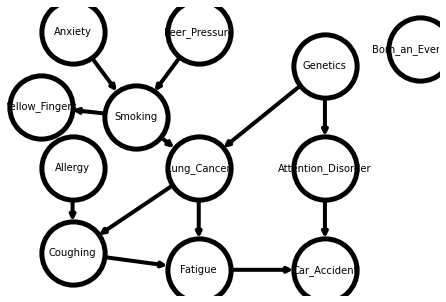

In [168]:
# we import networkx and create a directed graph
G = nx.DiGraph()

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-20, 0),
         'Coughing': (-20, -25), 'Lung_Cancer': (0, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=4000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "backdoor_criterion_graph.gml")